## 1. Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

## 2. Overview col

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Columns:
- *CRIM:* Per capita crime rate by town
- *ZN:* Proportion of residential land zoned for lots over 25,000 sq. ft
- *INDUS:* Proportion of non-retail business acres per town
- *CHAS :* Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- *NOX:* Nitric oxide concentration (parts per 10 million)
- *RM:* Average number of rooms per dwelling
- *AGE:* Proportion of owner-occupied units built prior to 1940
- *DIS:* Weighted distances to five Boston employment centers
- *RAD:* Index of accessibility to radial highways
- *PTRATIO:* Pupil-teacher ratio by town
- *B:*  1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- *LSTAT:* Percentage of lower status of the population
- *MEDV:* Median value of owner-occupied homes in $1000s

As you seen, there isn't "MEDV" column that we will try to predict. Let's add the column to our dataset.

In [4]:
dataset['MEDV'] = boston_dataset.target

In [5]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 3. Data Analysis 

> Are there missing values? There isn't any missing values as shown below.

In [6]:
dataset.isnull().sum().sum()

0

## 4. Visualizing Data

### before log transform

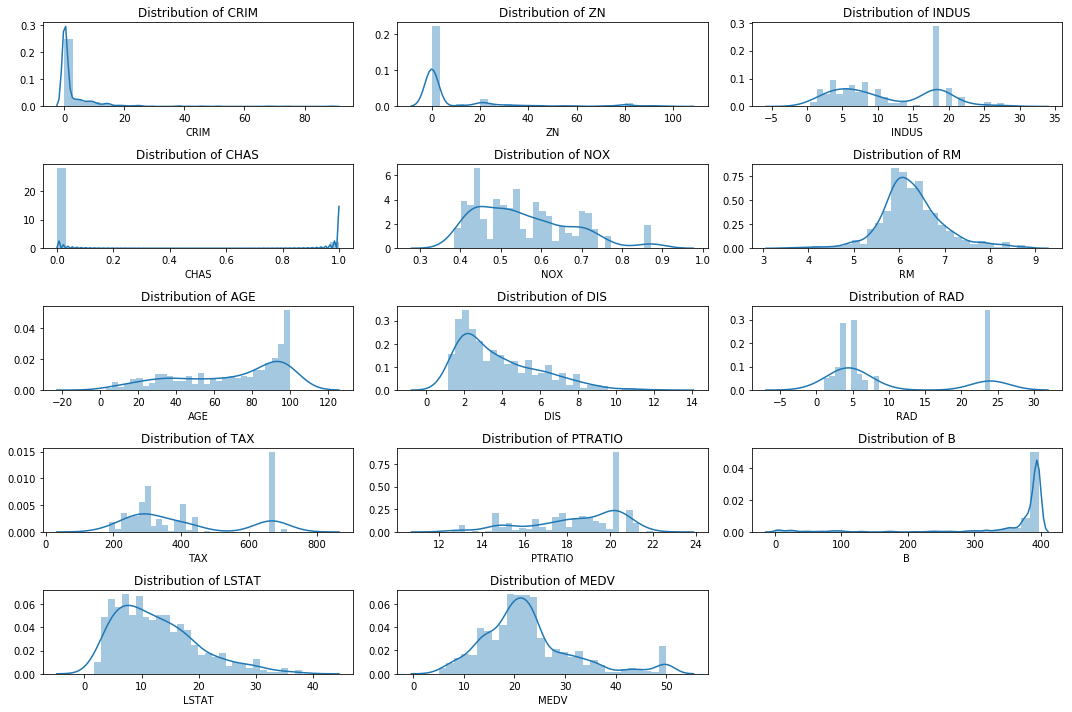

In [7]:
# Number of columns in your dataset
num_cols = len(dataset.columns)

# Create subplots with an appropriate layout
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3 > 0), ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each column in the dataset
for i, col in enumerate(dataset.columns):
    sns.distplot(dataset[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


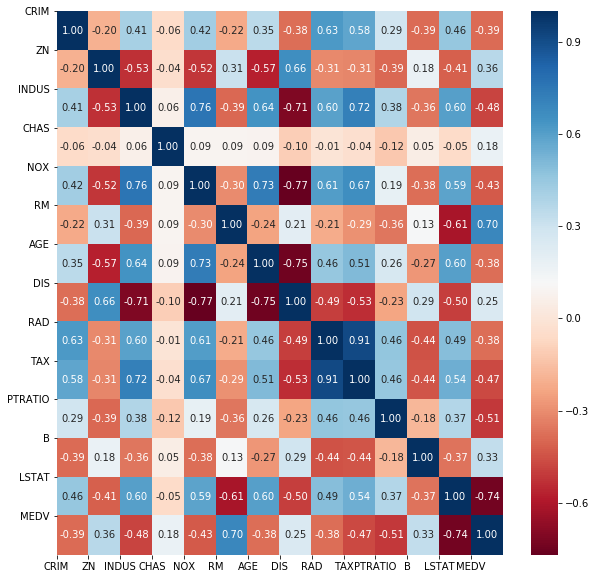

In [8]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [9]:
for i, col in enumerate(dataset.columns):
    print(f"Skewness: {col}: ", dataset[col].skew().round(3))

Skewness: CRIM:  5.223
Skewness: ZN:  2.226
Skewness: INDUS:  0.295
Skewness: CHAS:  3.406
Skewness: NOX:  0.729
Skewness: RM:  0.404
Skewness: AGE:  -0.599
Skewness: DIS:  1.012
Skewness: RAD:  1.005
Skewness: TAX:  0.67
Skewness: PTRATIO:  -0.802
Skewness: B:  -2.89
Skewness: LSTAT:  0.906
Skewness: MEDV:  1.108


In [10]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [11]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


In [12]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p,validate=False)

In [13]:
#df['TotalDeaths']=transformer.transform(df['TotalDeaths'])
#for i, col in enumerate(dataset.columns):
#    dataset[col]=transformer.transform(dataset[col])
dataset = pd.DataFrame(transformer.transform(dataset), columns=dataset.columns)

### after log transform

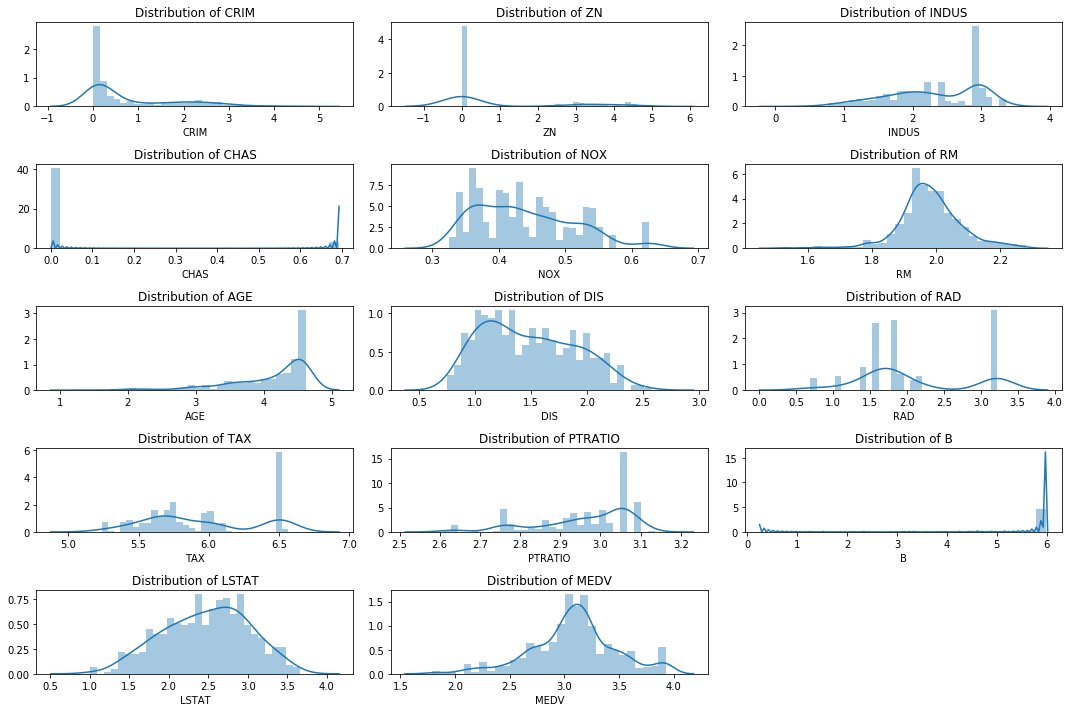

In [14]:
# Number of columns in your dataset
num_cols = len(dataset.columns)

# Create subplots with an appropriate layout
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3 > 0), ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each column in the dataset
for i, col in enumerate(dataset.columns):
    sns.distplot(dataset[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
